In [1]:
#Dynamic Smagorisnky calculation
#The example only deals with 30 modes, later filtering to 15.

from filters import Filters
import sys
import numpy as np

class DS:
    def __init__(self, dim, sps):
        self.dim = dim
        self.filt = getattr(Filters, 'spectral')
            
    def run(self, vals):
        sps.fm = 15

        u = vals[:,:3]
        du = vals[:,3:]
        u = np.moveaxis(u.reshape(self.dim,self.dim,self.dim, u.shape[-1]),-1,0)
        du = np.moveaxis(du.reshape(self.dim,self.dim,self.dim, du.shape[-1]),-1,0)

        L = self.Lvar(u)
        S = self.Stn(du)
        M, Sd = self.Mvar(S)

        Cd = np.zeros((self.dim, self.dim, self.dim))

        for i in range(self.dim):
            for j in range(self.dim):
                for k in range(self.dim):

                    Cd[i,j,k] = 1/2*((sum((np.matmul(L[:,:,i,j,k],M[:,:,i,j,k])).flatten())/9)/
                                    (sum(np.matmul(M[:,:,i,j,k],M[:,:,i,j,k]).flatten())/9))

        print('shape of L', L.shape)
        print('shape of M', M.shape)
        print('shape of Sd', Sd.shape)
        print('shape of Cd', Cd.shape)
        print('shape of S', S.shape)
        
        tn = np.zeros((3,3,self.dim, self.dim, self.dim))
        for i in range(3):
            for j in range(3):
                tn[i,j]=-2*Cd*Sd*S[i,j]
        return tn
            
    #Dynamic Smagorinsky
    def Lvar(self, u):
        #calculates stress tensor components
        length = len(u)
        tn = np.zeros((length,length,self.dim, self.dim, self.dim))
        for i in range(3):
            for j in range(3):
                tn[i,j] = (self.filt(sps, u[i]*u[j], self.dim)-
                           self.filt(sps, u[i], self.dim)*self.filt(sps, u[j], self.dim))
        return tn

    def Stn(self, du):
        length = 3 #len(u)
        
        sps.fm = 15
        S = np.zeros((length,length,self.dim, self.dim, self.dim))
        for i in range(3):
            for j in range(3):
                S[i,j] = 1/2*(du[i]+du[j])
        return S

    def Mvar(self, S):
        length = len(S)
        M = np.zeros((length,length,self.dim, self.dim,self.dim))

        Sd = np.zeros((self.dim, self.dim, self.dim))
        for i in range(self.dim):
            for j in range(self.dim):
                for k in range(self.dim):
                    Sd[i,j,k] = np.sqrt(2)*np.linalg.norm(S[:,:,i,j,k])

        for i in range(3):
            for j in range(3):
                #>>>>>>>>1/2 is the ratio of filters!<<<<<<<<<
                M[i,j] = (self.filt(sps,Sd*S[i,j], self.dim) - 
                           (1/2)**2*self.filt(sps, Sd, self.dim)*self.filt(sps,S[i,j], self.dim))
        return M, Sd

In [2]:
#Load defaults and filters

%matplotlib inline

from Sapsan import Sapsan

pars = {'path'      : '/raid1/JHTDB/mhd/max_1024/mhd128_t@.4/fm30/',
        'savepath'  : None,
        'dataset'   : 'mhd',
        'ttrain'    : [0],
        'axis'      : 3,
        'dim'       : 64,
        'max_dim'   : 128,
        'cube_size' : 64,
        'batch_size': 1,
        'train_fraction' : 0.5,
        'dt'        : 2.5e-3,
        'method'    : 'cnn',
        'parameters': ['u', 'b', 'a', 
                       'du0', 'du1', 'du2', 
                       'db0', 'db1', 'db2',
                       'da0', 'da1', 'da2'],
        'target'    : 'tn',
        'targetComp': 2
        }

ending = '_dim128_fm30'
pars['parameters'] = [i+ending for i in pars['parameters']]
pars['target'] += ending

sps = Sapsan(pars)

Running parameters:  {'path': '/raid1/JHTDB/mhd/max_1024/mhd128_t@.4/fm30/', 'savepath': None, 'dataset': 'mhd', 'ttrain': [0], 'axis': 3, 'dim': 64, 'max_dim': 128, 'cube_size': 64, 'batch_size': 1, 'train_fraction': 0.5, 'dt': 0.0025, 'method': 'cnn', 'parameters': ['u_dim128_fm30', 'b_dim128_fm30', 'a_dim128_fm30', 'du0_dim128_fm30', 'du1_dim128_fm30', 'du2_dim128_fm30', 'db0_dim128_fm30', 'db1_dim128_fm30', 'db2_dim128_fm30', 'da0_dim128_fm30', 'da1_dim128_fm30', 'da2_dim128_fm30'], 'target': 'tn_dim128_fm30', 'targetComp': 2}


In [3]:
#loading explicitely computed quantities

allvals = np.loadtxt('u_du_tn2_dim64.txt')
vals = np.moveaxis(allvals[:-3], -1,0) #u, du
target = np.moveaxis(allvals[-3:], -1,0) #tn[2]

In [4]:
print(vals.shape, target.shape)

(262144, 12) (262144, 3)


In [5]:
#Run the DS

ds = DS(64, sps)
ds_tn = ds.run(vals)

print(np.shape(ds_tn))

Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectral filter in: 0.1 s
Applied spectr

Original tn shape (262144, 3)
DS shape  (3, 3, 64, 64, 64)
Plotting the PDF
a number of outliers 67590
a number of outliers 3142


/home/pkarpov/Sapsan/sapsan/ResultAnalysis.py:97: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



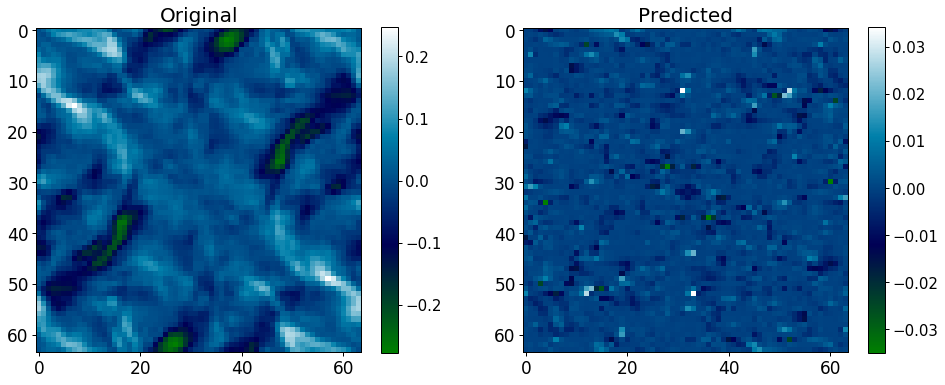

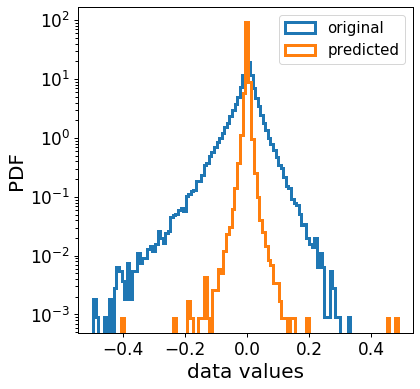

In [6]:
import matplotlib.pyplot as plt

print('Original tn shape', target.shape)
print('DS shape ', ds_tn.shape)


#plotting tn_xy component, slice through x direction
#Note: at least I *think* the components are in the right order for both

tn_component =1 #tn_xy

fig = plt.figure(figsize = (16, 6))
a = fig.add_subplot(121)
im = plt.imshow(target[:,tn_component].reshape(sps.dim,sps.dim,sps.dim)[0], cmap='ocean')
plt.colorbar(im).ax.tick_params(labelsize=15)
plt.title('Original')

a = fig.add_subplot(122)
im = plt.imshow(ds_tn[0,tn_component,0], cmap='ocean')
plt.colorbar(im).ax.tick_params(labelsize=15)
plt.title('Predicted')

target_flat = np.reshape(target[:,tn_component], (sps.dim**3))
ds_tn_flat = np.reshape(ds_tn[0,tn_component], (sps.dim**3))

sps.results.pdf(np.stack((target_flat,ds_tn_flat)))